In [30]:
import jieba
from collections import Counter
from os import path 
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from wordcloud import WordCloud , STOPWORDS
import pandas as pd

import jieba.posseg as pseg

In [7]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False 

word_count = dict()

15Í∞ú ÏÉÅÌíà 1544Í∞úÏùò Î¶¨Î∑∞

(4Í∞ú ÏùòÏÉÅ + 11Í∞ú Ïö¥ÎèôÌôî)

In [11]:
sample = pd.read_excel('sample_reveiw(1).xlsx')
words = sample['Content']

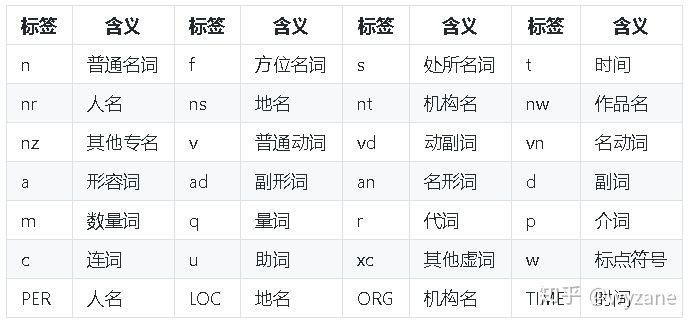

Ï§ëÍµ≠Ïñ¥ ÌÜ†ÌÅ∞Ìôî + ÌíàÏÇ¨ ÌÉúÍπÖ

In [90]:
# ÌÖåÏä§Ìä∏Ìï† Î¨∏Ïû•
sentence = "Â∞∫Á†ÅÂ§ßÂ∞è ÈÄÇ‰∏≠ ‰∫ßÂìÅÂìÅÊÄßÊÄß‰ª∑ÊØî ÊÄß‰ª∑ÊØîÂæàÈ´ò ÁâàÂûãÈ£éÊ†º ‰ºëÈó≤ËàíÈÄÇÔºåÂûã"

# ÌíàÏÇ¨ ÌÉúÍπÖ
cl_paddle = pseg.cut(sentence, use_paddle=True)

# ÌíàÏÇ¨ ÌÉúÍπÖ Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(cl_paddle, columns=['Îã®Ïñ¥', 'ÌíàÏÇ¨'])

# ÌíàÏÇ¨Î≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÍ≥† Í∞úÏàò ÏÑ∏Í∏∞
pos_counts = df.groupby('ÌíàÏÇ¨').size().reset_index(name='Í∞úÏàò')

# Í≤∞Í≥º Ï∂úÎ†•
print(pos_counts)


  ÌíàÏÇ¨  Í∞úÏàò
0  a   2
1  b   1
2  d   1
3  k   1
4  n   7
5  v   2
6  x   6


In [91]:
def tokenize(review):
    return jieba.lcut(review,cut_all=True)

def posseg(token):
    return pseg.cut(token,use_paddle=True)

seg_lst = words.apply(tokenize)
seg_lst_flat = [word for sublist in seg_lst for word in sublist]
cleaned_words = [word.strip('(),') for word in seg_lst_flat]

# Í≥µÎ∞±ÏúºÎ°ú Ïó∞Í≤∞
cut_txt = ' '.join(cleaned_words)

c_paddle = pseg.cut(cut_txt,use_paddle = True)
c_paddle_list = list(c_paddle)


In [107]:
c_paddle_list

[pair(' ', 'x'),
 pair('Â∞∫Á†Å', 'n'),
 pair(' ', 'x'),
 pair('Â§ßÂ∞è', 'b'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('ÈÄÇ‰∏≠', 'v'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('‰∫ßÂìÅ', 'n'),
 pair(' ', 'x'),
 pair('ÂìÅÊÄß', 'n'),
 pair(' ', 'x'),
 pair('ÊÄß‰ª∑ÊØî', 'n'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('ÊÄß‰ª∑ÊØî', 'n'),
 pair(' ', 'x'),
 pair('Âæà', 'zg'),
 pair(' ', 'x'),
 pair('È´ò', 'a'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('ÁâàÂûã', 'n'),
 pair(' ', 'x'),
 pair('È£éÊ†º', 'n'),
 pair(' ', 'x'),
 pair(' ', 'x'),
 pair('‰ºëÈó≤', 'v'),
 pair(' ', 'x'),
 pair('ËàíÈÄÇ', 'a'),
 pair(' ', 'x'),
 pair('Ôºå', 'x'),
 pair(' ', 'x'),
 pair('Âûã', 'k'),
 pair(' ', 'x'),
 pair('Âæà', 'zg'),
 pair(' ', 'x'),
 pair('Â•ΩÁúã', 'v'),
 pair(' ', 'x'),
 pair('Ôºå', 'x'),
 pair(' ', 'x'),
 pair('‰∏ä', 'f'),
 pair(' ', 'x'),
 pair('ËÑö', 'n'),
 pair(' ', 'x'),
 pair('ÊïàÊûú', 'n'),
 pair(' ',

In [89]:
for word, flag in c_paddle:
    print(f"{word}\t{flag}")


 	x
Â∞∫Á†Å	n
 	x
Â§ßÂ∞è	b
 	x
 	x
ÈÄÇ‰∏≠	v
 	x
 	x
 	x
 	x
 	x
‰∫ßÂìÅ	n
 	x
ÂìÅÊÄß	n
 	x
ÊÄß‰ª∑ÊØî	n
 	x
 	x
ÊÄß‰ª∑ÊØî	n
 	x
Âæà	zg
 	x
È´ò	a
 	x
 	x
 	x
 	x
 	x
ÁâàÂûã	n
 	x
È£éÊ†º	n
 	x
 	x
‰ºëÈó≤	v
 	x
ËàíÈÄÇ	a
 	x
Ôºå	x
 	x
Âûã	k
 	x
Âæà	zg
 	x
Â•ΩÁúã	v
 	x
Ôºå	x
 	x
‰∏ä	f
 	x
ËÑö	n
 	x
ÊïàÊûú	n
 	x
Âæà	zg
 	x
Â•Ω	a
 	x
Ôºå	x
 	x
Áà±	v
 	x
‰∫Ü	ul
 	x
Áà±	v
 	x
‰∫Ü	ul
 	x
 	x
‰∫ßÂìÅ	n
 	x
ÂìÅÊÄß	n
 	x
ÊÄß‰ª∑ÊØî	n
 	x
 	x
È´ò	a
 	x
 	x
 	x
 	x
 	x
ÁâàÂûã	n
 	x
È£éÊ†º	n
 	x
 	x
‰ºëÈó≤	v
 	x
Èó≤Êó∂	t
 	x
Êó∂Â∞ö	n
 	x
 	x
 	x
 	x
 	x
Â∞∫Á†Å	n
 	x
Â§ßÂ∞è	b
 	x
 	x
Âπ≥Êó∂	t
 	x
37	m
 	x
 	x
 	x
 	x
 	x
Ëøô	r
Ê¨æ	m
 	x
‰π∞	v
 	x
ÁöÑ	uj
 	x
38	m
 	x
Âàö	d
 	x
ÂêàÈÄÇ	a
 	x
Ôºå	x
 	x
ÈûãÂ≠ê	n
 	x
ÁúüÁöÑ	d
 	x
Âæà	zg
 	x
ËàíÊúç	a
 	x
Ôºå	x
 	x
Êúâ	v
 	x
ÂõûÂºπ	v
 	x
ÁöÑ	uj
 	x
ÊÑüËßâ	n
 	x
Ôºå	x
 	x
‰∏ä	f
 	x
ËÑö	n
 	x
Ëµ∞Ë∑Ø	n
 	x
ÁúüÁöÑ	d
 	x
ËàíÊúç	a
 	x
 	x
Â∞∫Á†Å	n
 	x
Â§ßÂ∞è	b
 	x
 	x
ÈÄÇ‰∏≠	v
 	x
 	x
 	x
 	x
 	x
‰∫ßÂìÅ	n
 	x
ÂìÅÊÄß	n
 	x
ÊÄß‰ª∑ÊØî	n
 	x
 	x
È´ò	a
 	x
 	x
 	x
 	x
 	x
Áâà

In [100]:
# ÌíàÏÇ¨ ÏΩîÎìúÏôÄ ÏùòÎØ∏Î•º Îß§ÌïëÌïú ÎîïÏÖîÎÑàÎ¶¨
pos_mapping = {
    'x': 'Êú™Áü•Ë™û (Unknown)',
    'n': 'Î™ÖÏÇ¨ (Noun)',
    'v': 'ÎèôÏÇ¨ (Verb)',
    'a': 'ÌòïÏö©ÏÇ¨ (Adjective)',
    'd': 'Î∂ÄÏÇ¨ (Adverb)',
    'zg': 'Ï§ëÍµ≠Ïñ¥ (Chinese word)',
    'b': 'Ìè¨Ìï® (including)',
    'm': 'ÏàòÏÇ¨ (Numeral)',
    'uj': 'Ï°∞ÏÇ¨ (Auxiliary)',
    'vn': 'Î™ÖÎèôÏÇ¨ (Noun for Adjective)',
    'r': 'ÎåÄÎ™ÖÏÇ¨ (Pronoun)',
    'c': 'Ï†ëÏÜçÏÇ¨ (Conjunction)',
    'ul': 'ÏùòÏÑ±Ïñ¥ (Auxiliary word)', 
    'p': 'Ï†ÑÏπòÏÇ¨ (Preposition)',
    'o': 'ÏùòÏÑ±Ïñ¥ (Onomatopoeia)',
    'f': 'Î∞©ÏúÑÏÇ¨ (Localizer)',
    't': 'ÏãúÍ∞ÑÏñ¥ (Time word)',
    'nr': 'ÏÇ¨Îûå Ïù¥Î¶Ñ (Name of person)',
    'ns': 'ÏßÄÏó≠ Ïù¥Î¶Ñ (Name of place)',
    'l': 'Í¥ÄÏö©Íµ¨ (Idiom)',
    'ad': 'ÌòïÏö©ÏÇ¨ Î∂ÄÏÇ¨ (Adverb of adjective)',
    'y': 'Ïñ¥Ï°∞ Î∂ÄÏÇ¨ (Modal particle)',
    'nz': 'Í∏∞ÌÉÄ Í≥†Ïú† Î™ÖÏÇ¨ (Other proper noun)',
    'i': 'ÏÑ±Ïñ¥ (Idiom)',
    'q': 'ÏñëÏÇ¨ (Measure word)',
    'z': 'ÏÉÅÌÉú ÌòïÏö©ÏÇ¨ (State word)',
    'eng': 'ÏòÅÏñ¥Îã®Ïñ¥ (English word)',
    'ug': 'Í∞úÎ≥Ñ Ïñ¥ÌòïÏÜå (Individual morpheme)', #ÂêßÔºå‰∫ÜÔºåÁùÄÏôÄ Í∞ôÏù¥ ÌäπÏ†ï Îã®Ïñ¥ÏôÄ Í≤∞Ìï©Ìï¥ Î¨∏Ïû•ÏùÑ ÌòïÏÑ±ÌïòÍ±∞ÎÇò ÌäπÏ†ï ÎâòÏïôÏä§Î•¥ Î∂ÄÏó¨Ìï®
    'e': 'Í∞êÌÉÑÏÇ¨ (Interjection)',
    'ud': 'ÎèôÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for verb)',
    'u': 'Ï°∞ÎèôÏÇ¨ (Auxiliary verb)',
    's': 'Ïû•ÏÜåÏÇ¨ (Place word)',
    'k': 'Ï†ëÎØ∏ÏÇ¨ (Suffix)',
    'nrt': 'Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨ (Personal pronoun)',
    'ng': 'Î™ÖÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for noun)',
    'uz': 'Ïñ¥Ìúò Íµ¨ÏÑ± ÏöîÏÜå (Constituent of compound words)',
    'j': 'ÏïΩÏñ¥ (Abbreviation)',
    'vd': 'Î∂ÄÎèôÏÇ¨ (Adverb for verb)',
    'df': 'Î∂àÍ∞ÄÏÇ∞ Î™ÖÏÇ¨ (Uncountable noun)',
    'uv': 'Ïû•ÏÜå ÎèôÏÇ¨ (Verb for place)',
    'mq': 'ÏàòÎüâÏÇ¨ (Quantifier)',
    'an': 'Î™ÖÏÇ¨ ÌòïÏö©ÏÇ¨ (Noun for noun)',
    'g': 'Ïñ¥ÏÜå/Ïñ¥Í∑º (Morpheme)',
    'tg': 'ÏãúÍ∞Ñ Ïñ¥Í∑º (Morpheme for time)',
    'uz': 'Í≥†Ïú† Î™ÖÏÇ¨ (Proper noun)',
}

# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ± Ìï®Ïàò
def create_pos_dataframe(pos_counts):
    pos_df = pd.DataFrame(pos_counts, columns=['ÌíàÏÇ¨ ÏΩîÎìú', 'Í∞úÏàò'])
    pos_df['ÌíàÏÇ¨ ÏùòÎØ∏'] = pos_df['ÌíàÏÇ¨ ÏΩîÎìú'].map(pos_mapping)
    return pos_df

# ÌíàÏÇ¨ Í∞úÏàò Í≥ÑÏÇ∞
pos_cnt = df['ÌíàÏÇ¨'].value_counts().reset_index()
pos_cnt.columns = ['ÌíàÏÇ¨ ÏΩîÎìú', 'Í∞úÏàò']

# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
pos_df = create_pos_dataframe(pos_cnt)


In [101]:
pos_df

ÌíàÏÇ¨ ÏΩîÎìú     Í∞úÏàò                         ÌíàÏÇ¨ ÏùòÎØ∏
0      x  44248                 Êú™Áü•Ë™û (Unknown)
1      n   8996                     Î™ÖÏÇ¨ (Noun)
2      v   4701                     ÎèôÏÇ¨ (Verb)
3      a   3155               ÌòïÏö©ÏÇ¨ (Adjective)
4      d   2180                   Î∂ÄÏÇ¨ (Adverb)
5     zg   1289            Ï§ëÍµ≠Ïñ¥ (Chinese word)
6      b   1058                Ìè¨Ìï® (including)
7      m    862                  ÏàòÏÇ¨ (Numeral)
8     uj    727                Ï°∞ÏÇ¨ (Auxiliary)
9     vn    721      Î™ÖÎèôÏÇ¨ (Noun for Adjective)
10     r    496                 ÎåÄÎ™ÖÏÇ¨ (Pronoun)
11     c    459             Ï†ëÏÜçÏÇ¨ (Conjunction)
12    ul    408          ÏùòÏÑ±Ïñ¥ (Auxiliary word)
13     p    303             Ï†ÑÏπòÏÇ¨ (Preposition)
14     o    284            ÏùòÏÑ±Ïñ¥ (Onomatopoeia)
15     f    280               Î∞©ÏúÑÏÇ¨ (Localizer)
16     t    247               ÏãúÍ∞ÑÏñ¥ (Time word)
17    nr    156        ÏÇ¨Îûå Ïù¥Î¶Ñ (Name of person)
18    ns    134         ÏßÄÏó≠ Ïù¥Î¶Ñ (Name of place)
19     l    128                   Í¥ÄÏö©Íµ¨ (Idiom)
20    ad    101  ÌòïÏö©ÏÇ¨ Î∂ÄÏÇ¨ (Adverb of adjective)
21     y     97        Ïñ¥Ï°∞ Î∂ÄÏÇ¨ (Modal particle)
22    nz     69  Í∏∞ÌÉÄ Í≥†Ïú† Î™ÖÏÇ¨ (Other proper noun)
23     i     62                    ÏÑ±Ïñ¥ (Idiom)
24     q     59             ÏñëÏÇ¨ (Measure word)
25     z     52           ÏÉÅÌÉú ÌòïÏö©ÏÇ¨ (State word)
26   eng     38           ÏòÅÏñ¥Îã®Ïñ¥ (English word)
27    ug     35  Í∞úÎ≥Ñ Ïñ¥ÌòïÏÜå (Individual morpheme)
28     e     34            Í∞êÌÉÑÏÇ¨ (Interjection)
29    ud     34    ÎèôÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for verb)
30     u     33          Ï°∞ÎèôÏÇ¨ (Auxiliary verb)
31     s     27              Ïû•ÏÜåÏÇ¨ (Place word)
32     k     19                  Ï†ëÎØ∏ÏÇ¨ (Suffix)
33   nrt     10      Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨ (Personal pronoun)
34    ng     10    Î™ÖÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for noun)
35    uz      9           Í≥†Ïú† Î™ÖÏÇ¨ (Proper noun)
36     j      7             ÏïΩÏñ¥ (Abbreviation)
37    vd      7         Î∂ÄÎèôÏÇ¨ (Adverb for verb)
38    df      6     Î∂àÍ∞ÄÏÇ∞ Î™ÖÏÇ¨ (Uncountable noun)
39    uv      4        Ïû•ÏÜå ÎèôÏÇ¨ (Verb for place)
40    mq      2              ÏàòÎüâÏÇ¨ (Quantifier)
41    an      2        Î™ÖÏÇ¨ ÌòïÏö©ÏÇ¨ (Noun for noun)
42     g      1              Ïñ¥ÏÜå/Ïñ¥Í∑º (Morpheme)
43    tg      1     ÏãúÍ∞Ñ Ïñ¥Í∑º (Morpheme for time)

ÏÉÅÏúÑ 10Í∞ú ÌÇ§ÏõåÎìú df ÌòïÌÉúÎ°ú ÌôïÏù∏ÌïòÍ∏∞

In [209]:
def create_pos_dataframe(c_paddle_list):
    pos_counts = {}
    for word, pos in c_paddle_list:
        if pos not in pos_counts:
            pos_counts[pos] = {'Îã®Ïñ¥': []}
        pos_counts[pos]['Îã®Ïñ¥'].append(word)

    pos_df = pd.DataFrame(pos_counts).T.reset_index()
    pos_df.columns = ['ÌíàÏÇ¨ ÏΩîÎìú', 'Îã®Ïñ¥']
    pos_df['ÌíàÏÇ¨ ÏùòÎØ∏'] = pos_df['ÌíàÏÇ¨ ÏΩîÎìú'].map(pos_mapping)
    return pos_df[['ÌíàÏÇ¨ ÏΩîÎìú', 'ÌíàÏÇ¨ ÏùòÎØ∏', 'Îã®Ïñ¥']]

# DataFrame ÏÉùÏÑ±
sample_df = create_pos_dataframe(c_paddle_list)
word_counts = sample_df.explode('Îã®Ïñ¥').groupby(['ÌíàÏÇ¨ ÏΩîÎìú', 'Îã®Ïñ¥']).size().reset_index(name='Îì±Ïû• ÌöüÏàò')
top10_words = word_counts.groupby('ÌíàÏÇ¨ ÏΩîÎìú').apply(lambda x: x.nlargest(10, 'Îì±Ïû• ÌöüÏàò')).reset_index(drop=True)
top10_keywords = top10_words.groupby('ÌíàÏÇ¨ ÏΩîÎìú').apply(lambda x: x['Îã®Ïñ¥'].tolist()).reset_index(name='ÏÉÅÏúÑÌÇ§ÏõåÎìú_top10')
sample_df = pd.merge(sample_df, top10_keywords, on='ÌíàÏÇ¨ ÏΩîÎìú', how='left')
sample_df 

ÌíàÏÇ¨ ÏΩîÎìú                         ÌíàÏÇ¨ ÏùòÎØ∏  \
0      x                 Êú™Áü•Ë™û (Unknown)   
1      n                     Î™ÖÏÇ¨ (Noun)   
2      b                Ìè¨Ìï® (including)   
3      v                     ÎèôÏÇ¨ (Verb)   
4     zg            Ï§ëÍµ≠Ïñ¥ (Chinese word)   
5      a               ÌòïÏö©ÏÇ¨ (Adjective)   
6      k                  Ï†ëÎØ∏ÏÇ¨ (Suffix)   
7      f               Î∞©ÏúÑÏÇ¨ (Localizer)   
8     ul          ÏùòÏÑ±Ïñ¥ (Auxiliary word)   
9      t               ÏãúÍ∞ÑÏñ¥ (Time word)   
10     m                  ÏàòÏÇ¨ (Numeral)   
11     r                 ÎåÄÎ™ÖÏÇ¨ (Pronoun)   
12    uj                Ï°∞ÏÇ¨ (Auxiliary)   
13     d                   Î∂ÄÏÇ¨ (Adverb)   
14    vn      Î™ÖÎèôÏÇ¨ (Noun for Adjective)   
15     o            ÏùòÏÑ±Ïñ¥ (Onomatopoeia)   
16    nr        ÏÇ¨Îûå Ïù¥Î¶Ñ (Name of person)   
17     l                   Í¥ÄÏö©Íµ¨ (Idiom)   
18     p             Ï†ÑÏπòÏÇ¨ (Preposition)   
19   eng           ÏòÅÏñ¥Îã®Ïñ¥ (English word)   
20   nrt      Ïù∏Ïπ≠ÎåÄÎ™ÖÏÇ¨ (Personal pronoun)   
21    ns         ÏßÄÏó≠ Ïù¥Î¶Ñ (Name of place)   
22    nz  Í∏∞ÌÉÄ Í≥†Ïú† Î™ÖÏÇ¨ (Other proper noun)   
23     c             Ï†ëÏÜçÏÇ¨ (Conjunction)   
24    uv        Ïû•ÏÜå ÎèôÏÇ¨ (Verb for place)   
25     q             ÏñëÏÇ¨ (Measure word)   
26    ad  ÌòïÏö©ÏÇ¨ Î∂ÄÏÇ¨ (Adverb of adjective)   
27    ud    ÎèôÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for verb)   
28     y        Ïñ¥Ï°∞ Î∂ÄÏÇ¨ (Modal particle)   
29     z           ÏÉÅÌÉú ÌòïÏö©ÏÇ¨ (State word)   
30     i                    ÏÑ±Ïñ¥ (Idiom)   
31     u          Ï°∞ÎèôÏÇ¨ (Auxiliary verb)   
32     s              Ïû•ÏÜåÏÇ¨ (Place word)   
33    ng    Î™ÖÏÇ¨ ÌòïÌÉúÏÜå (Morpheme for noun)   
34     e            Í∞êÌÉÑÏÇ¨ (Interjection)   
35    ug  Í∞úÎ≥Ñ Ïñ¥ÌòïÏÜå (Individual morpheme)   
36    mq              ÏàòÎüâÏÇ¨ (Quantifier)   
37     j             ÏïΩÏñ¥ (Abbreviation)   
38    an        Î™ÖÏÇ¨ ÌòïÏö©ÏÇ¨ (Noun for noun)   
39    uz           Í≥†Ïú† Î™ÖÏÇ¨ (Proper noun)   
40     g              Ïñ¥ÏÜå/Ïñ¥Í∑º (Morpheme)   
41    vd         Î∂ÄÎèôÏÇ¨ (Adverb for verb)   
42    tg     ÏãúÍ∞Ñ Ïñ¥Í∑º (Morpheme for time)   
43    df     Î∂àÍ∞ÄÏÇ∞ Î™ÖÏÇ¨ (Uncountable noun)   

                                                   Îã®Ïñ¥  \
0   [ ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , ...   
1   [Â∞∫Á†Å, ‰∫ßÂìÅ, ÂìÅÊÄß, ÊÄß‰ª∑ÊØî, ÊÄß‰ª∑ÊØî, ÁâàÂûã, È£éÊ†º, ËÑö, ÊïàÊûú, ‰∫ßÂìÅ, ÂìÅÊÄß, ...   
2   [Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ßÂ∞è, Â§ß...   
3   [ÈÄÇ‰∏≠, ‰ºëÈó≤, Â•ΩÁúã, Áà±, Áà±, ‰ºëÈó≤, ‰π∞, Êúâ, ÂõûÂºπ, ÈÄÇ‰∏≠, Áúã, ‰π∞, Â•ΩÁúã,...   
4   [Âæà, Âæà, Âæà, Âæà, Á©ø, Á©ø, Âæà, Âì¶, Ë°å, Âæà, Âæà, Á©ø, Á©ø, Á©ø, Á©ø, ...   
5   [È´ò, ËàíÈÄÇ, Â•Ω, È´ò, ÂêàÈÄÇ, ËàíÊúç, ËàíÊúç, È´ò, ËàíÊúç, ËΩª‰æø, ÂÅè, Â∞è, Â∞è, ...   
6   [Âûã, Âûã, ‰ª¨, ËÄÖ, Âûã, ‰ª¨, Âûã, Âûã, Âûã, Âûã, ‰ª¨, Âûã, Âûã, Âûã, Âûã, ...   
7   [‰∏ä, ‰∏ä, ‰∏ä, ÂêéÈù¢, ‰∏ä, Âêé, ‰∏ä, ‰∏ä, ‰∏ä, ‰∏ä, ‰∏ä, ‰∏ä, ‰∏ä, ‰∏≠, ‰∏ä,...   
8   [‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ‰∫Ü, ...   
9   [Èó≤Êó∂, Âπ≥Êó∂, Èó≤Êó∂, ÂÜ¨Â§©, Âπ≥Êó∂, Êò•Â§©, ‰∏ãÊ¨°, Â§èÂ§©, ËøáÊó∂, ÁßãÂÜ¨, Èõ®Â§©, Èó∞...   
10  [37, Ê¨æ, 38, Â§ßÂçä, Ê¨æ, ÂçÅ, Ê¨æ, ‰∏Ä, Ê¨æ, ‰∏Ä, ÁÇπ, 36, Ê¨æ, 37...   
11  [Ëøô, ËøôÊ†∑, Ëøô‰∏™, Ëøô, Ëøô, ‰ªñÂÆ∂, Ëá™Â∑±, ËØ•ÊòØ, Êàë, Ëøô‰∏™, ÊÄé‰πà, ÈÇ£‰πà, ÈÇ£...   
12  [ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ÁöÑ, ...   
13  [Âàö, ÁúüÁöÑ, ÁúüÁöÑ, Â∞±, ÂàöÂàö, ÂàöÂ•Ω, Â∞±ÊòØ, Âàö, ‰∏ÄÁõ¥, ‰πü, ÈùûÂ∏∏, ÁÆÄÁ∫¶, Ëøò...   
14  [ËøêÂä®, ËøêÂä®, ËøêÂä®, ËøêÂä®, ËøêÂä®, ËøêÂä®, ÂÆûÊÉ†, ËøêÂä®, ËøêÂä®, ËøêÂä®, Ê¥ªÂä®, Ëøê...   
15  [ÂòéÂòé, ÂìàÂìà, ÂìàÂìà, ÂìàÂìàÂìà, ÂìàÂìàÂìàÂìà, ÂìàÂìà, ÂìàÂìàÂìà, ÂìàÂìàÂìàÂìà, ÂìàÂìà, ÂìàÂìàÂìà...   
16  [ÂòéÂòéÂìç, Èáë, ËÄÅÂÖ¨, ÂÆùË¥ù, ÊÆµÊó∂Èó¥, ËÄÅÂÖ¨, È¢ú, ËÄÅÂÖ¨, Â§©Ê∞îÊô¥Êúó, ÂïäÂïäÂïä, ÂïäÂïä...   
17  [Áâ©ÊúâÊâÄÂÄº, Ë∑ëÊ≠•Ëµ∞, Ëµ∞Ëµ∑Ë∑ØÊù•, ËØ¥ÂÆûËØù, Ê≤°ÂæóËØ¥, ÊòØ‰∏çÊòØ, ‰∏çÂ§ß‰∏çÂ∞è, ‰∏ÄÊ®°‰∏ÄÊ†∑, Áâ©...   
18  [Ë∑ü, ÊØî, ÊØî, ÊØî, Ë¢

#ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú

Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉàÎ°ú Íµ¨ÏÑ±

In [230]:
# def create_pos_dataframe(c_paddle_list):
#     pos_counts = {}
#     for word, pos in c_paddle_list:
#         if pos not in pos_counts:
#             pos_counts[pos] = {'Îã®Ïñ¥': []}
#         pos_counts[pos]['Îã®Ïñ¥'].append(word)

#     pos_df = pd.DataFrame(pos_counts).T.reset_index()
#     pos_df.columns = ['ÌíàÏÇ¨ ÏΩîÎìú', 'Îã®Ïñ¥']
#     pos_df['ÌíàÏÇ¨ ÏùòÎØ∏'] = pos_df['ÌíàÏÇ¨ ÏΩîÎìú'].map(pos_mapping)
#     return pos_df[['ÌíàÏÇ¨ ÏΩîÎìú', 'ÌíàÏÇ¨ ÏùòÎØ∏', 'Îã®Ïñ¥']]

wclod_df = pd.DataFrame(c_paddle_list,columns=['Îã®Ïñ¥','ÌíàÏÇ¨ ÏΩîÎìú'])
wclod_df = wclod_df[wclod_df['Îã®Ïñ¥']!=' ']
wclod_df = wclod_df[wclod_df['ÌíàÏÇ¨ ÏΩîÎìú']!='x']


# wclod_dfÏóêÏÑú Îã®Ïñ¥ÏôÄ ÌíàÏÇ¨ ÏΩîÎìú Ïª¨Îüº Ï∂îÏ∂ú
n_words_df = wclod_df[wclod_df['ÌíàÏÇ¨ ÏΩîÎìú'] == 'n']
v_words_df = wclod_df[wclod_df['ÌíàÏÇ¨ ÏΩîÎìú'] == 'v']
a_words_df = wclod_df[wclod_df['ÌíàÏÇ¨ ÏΩîÎìú'] == 'a']
# ÏÑ†ÌÉùÎêú ÌñâÏóêÏÑú 'Îã®Ïñ¥'ÏôÄ 'ÌíàÏÇ¨ ÏΩîÎìú' Ïª¨Îüº Ï∂îÏ∂ú
nwords_list = n_words_df['Îã®Ïñ¥'].tolist()
vwords_list = v_words_df['Îã®Ïñ¥'].tolist()
awords_list = a_words_df['Îã®Ïñ¥'].tolist()

icon_path = 'cloud.png'
icon = Image.open(icon_path)
mask = Image.new('RGB',icon.size,(255,255,255))
mask.paste(icon,icon)
mask= np.array



In [203]:
wclod_df

Îã®Ïñ¥ ÌíàÏÇ¨ ÏΩîÎìú
1      Â∞∫Á†Å     n
3      Â§ßÂ∞è     b
6      ÈÄÇ‰∏≠     v
12     ‰∫ßÂìÅ     n
14     ÂìÅÊÄß     n
...    ..   ...
71540  Â∏åÊúõ     v
71542   Ë∂ä     d
71544  Á©øË∂ä     v
71546   Â§ß     a
71548   Âêß     y

[27303 rows x 2 columns]

In [194]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([255,255,255]) # RGB code of white color

font_path = 'SNsanafonGyou.ttf'



findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not foun

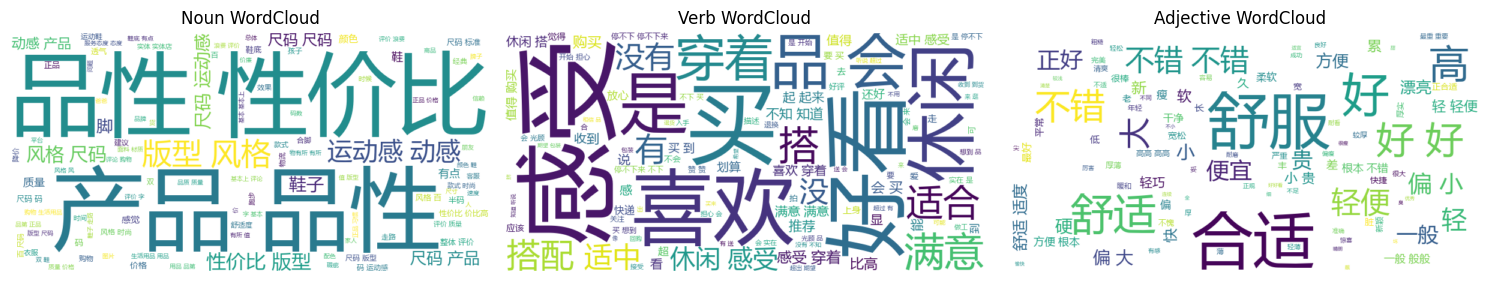

In [231]:
n_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(nwords_list))
v_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(vwords_list))
a_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(awords_list))
# wordcloud = WordCloud(
#     width=800, 
#     height=400, 
#     max_words=100, 
#     background_color='white', # font_pathÎ•º ÎπÑÏõåÎëêÎ©¥ ÏãúÏä§ÌÖú Ìè∞Ìä∏Î•º ÏÇ¨Ïö©
#     font_path = 'msyh.ttc'
# ).generate_from_frequencies(word_freq)


# Í∑∏Î¶ºÏùÑ ÎÇòÌÉÄÎÇº ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ï
plt.figure(figsize=(15, 5))

# Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'Î™ÖÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 1)
plt.imshow(n_wordcloud, interpolation='bilinear')
plt.title('Noun WordCloud')
plt.axis('off')

# Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'ÎèôÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 2)
plt.imshow(v_wordcloud, interpolation='bilinear')
plt.title('Verb WordCloud')
plt.axis('off')

# ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'ÌòïÏö©ÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 3)
plt.imshow(a_wordcloud, interpolation='bilinear')
plt.title('Adjective WordCloud')
plt.axis('off')

# ÏÑúÎ∏åÌîåÎ°Ø Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†à
plt.tight_layout()

# Ï†ÑÏ≤¥ ÌîåÎ°Ø Î≥¥Ïó¨Ï£ºÍ∏∞
plt.show()

ÌïúÍµ≠Ïñ¥Î°ú Î≤àÏó≠Ìï¥ÏÑú ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Î≥¥Ïó¨Ï£ºÍ∏∞

In [219]:
import requests

def translate_chinese_to_korean(text):
    url = "https://naveropenapi.apigw.ntruss.com/nmt/v1/translation"
    headers = {
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "X-NCP-APIGW-API-KEY-ID": '80n8upg8r6',
        "X-NCP-APIGW-API-KEY": 'SO6rZZRouKVKzT7v5Ud2ooJxhK8pflVpictnwe8o',
    }
    data = {"source": "zh-CN", "target": "ko", "text": text}
    
    try:
        response = requests.post(url, headers=headers, data=data)
        response.raise_for_status()  # HTTP ÏóêÎü¨Í∞Ä Î∞úÏÉùÌïòÎ©¥ ÏòàÏô∏ Î∞úÏÉù
        translated_text = response.json()["message"]["result"]["translatedText"]
        return translated_text
    except requests.exceptions.RequestException as e:
        print(f"Translation failed: {e}")
        return None


In [208]:
chinese_text = "‰Ω†Â•ΩÔºåËøôÊòØ‰∏Ä‰∏™Á§∫‰æã„ÄÇ"
korean_text = translate_chinese_to_korean(chinese_text)
korean_text

'ÏïàÎÖïÌïòÏÑ∏Ïöî, Ïù¥Í≤ÉÏùÄ ÏòàÏãúÏûÖÎãàÎã§.'

In [222]:
nwords_list = list(set(nwords_list))

In [224]:
len(nwords_list)

559

In [225]:
kor_nlst = []
for word in nwords_list:
    kor_nlst.append(translate_chinese_to_korean(word))



In [227]:
vwords_list = list(set(vwords_list))
awords_list = list(set(awords_list))

kor_vlst=[]
kor_alst=[]

for word in vwords_list:
    kor_vlst.append(translate_chinese_to_korean(word))

for word in awords_list:
    kor_alst.append(translate_chinese_to_korean(word))    

In [229]:
# ÎîïÏÖîÎÑàÎ¶¨ ÏôÑÏÑ±~

n_mapping = pd.DataFrame({'ÌïúÍµ≠Ïñ¥ Î™ÖÏÇ¨': kor_nlst, 'Ï§ëÍµ≠Ïñ¥ Î™ÖÏÇ¨': nwords_list})
v_mapping = pd.DataFrame({'ÌïúÍµ≠Ïñ¥ ÎèôÏÇ¨': kor_vlst, 'Ï§ëÍµ≠Ïñ¥ ÎèôÏÇ¨': vwords_list})
a_mapping = pd.DataFrame({'ÌïúÍµ≠Ïñ¥ ÌòïÏö©ÏÇ¨': kor_alst, 'Ï§ëÍµ≠Ïñ¥ ÌòïÏö©ÏÇ¨': awords_list})

In [244]:
n_words_merged = pd.merge(n_words_df, n_mapping, how='left', left_on='Îã®Ïñ¥', right_on='Ï§ëÍµ≠Ïñ¥ Î™ÖÏÇ¨')
v_words_merged = pd.merge(v_words_df, v_mapping, how='left', left_on='Îã®Ïñ¥', right_on='Ï§ëÍµ≠Ïñ¥ ÎèôÏÇ¨')
a_words_merged = pd.merge(a_words_df, a_mapping, how='left', left_on='Îã®Ïñ¥', right_on='Ï§ëÍµ≠Ïñ¥ ÌòïÏö©ÏÇ¨')
n_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'] = n_words_merged.apply(lambda row: f"{row['Ï§ëÍµ≠Ïñ¥ Î™ÖÏÇ¨']} ({row['ÌïúÍµ≠Ïñ¥ Î™ÖÏÇ¨']})", axis=1)
v_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'] = v_words_merged.apply(lambda row: f"{row['Ï§ëÍµ≠Ïñ¥ ÎèôÏÇ¨']} ({row['ÌïúÍµ≠Ïñ¥ ÎèôÏÇ¨']})", axis=1)
a_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'] = _words_merged.apply(lambda row: f"{row['Ï§ëÍµ≠Ïñ¥ ÌòïÏö©ÏÇ¨']} ({row['ÌïúÍµ≠Ïñ¥ ÌòïÏö©ÏÇ¨']})", axis=1)

findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: simHei
findfont: Generic family 'sans-serif' not foun

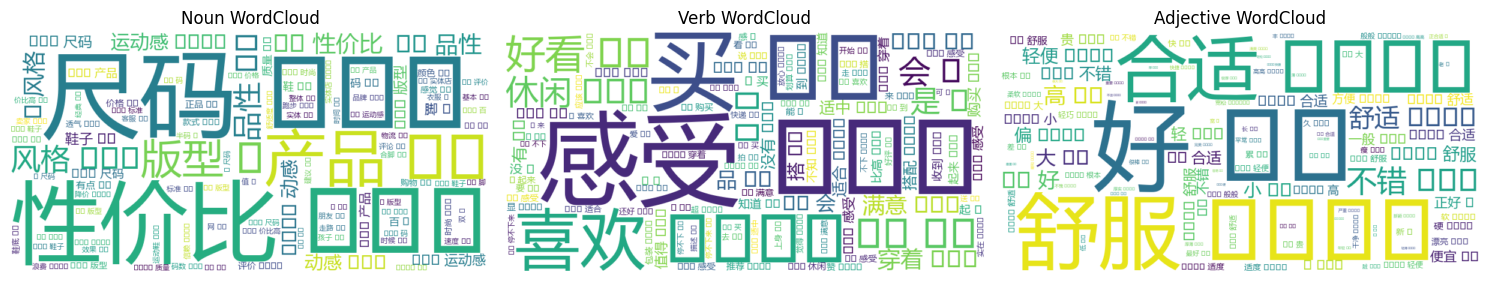

In [250]:
kor_nlist = n_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'].tolist()
kor_vlist = v_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'].tolist()
kor_alist = a_words_merged['ÌïúÏ§ë_Î≥ëÍ∏∞'].tolist()


nkor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_nlist))
vkor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_vlist))
akor_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path = 'msyh.ttc').generate(' '.join(kor_alist))
# wordcloud = WordCloud(
#     width=800, 
#     height=400, 
#     max_words=100, 
#     background_color='white', # font_pathÎ•º ÎπÑÏõåÎëêÎ©¥ ÏãúÏä§ÌÖú Ìè∞Ìä∏Î•º ÏÇ¨Ïö©
#     font_path = 'msyh.ttc'
# ).generate_from_frequencies(word_freq)


# Í∑∏Î¶ºÏùÑ ÎÇòÌÉÄÎÇº ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ï
plt.figure(figsize=(15, 5))

# Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'Î™ÖÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 1)
plt.imshow(nkor_wordcloud, interpolation='bilinear')
plt.title('Noun WordCloud')
plt.axis('off')

# Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'ÎèôÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 2)
plt.imshow(vkor_wordcloud, interpolation='bilinear')
plt.title('Verb WordCloud')
plt.axis('off')

# ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø: 'ÌòïÏö©ÏÇ¨' ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 3, 3)
plt.imshow(akor_wordcloud, interpolation='bilinear')
plt.title('Adjective WordCloud')
plt.axis('off')

# ÏÑúÎ∏åÌîåÎ°Ø Í∞Ñ Í∞ÑÍ≤© Ï°∞Ï†à
plt.tight_layout()

# Ï†ÑÏ≤¥ ÌîåÎ°Ø Î≥¥Ïó¨Ï£ºÍ∏∞
plt.show()